# Regression Example with Sklearn

With Linear Regression and kNN.

## Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline


from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## Load Data

In [84]:
df = pd.read_csv('gb_house_pricing.csv')
pd.set_option('display.max_columns', None)
df.head()

,Split,Id,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice,mszoning_num,HasMiscFeature,HouseStyle_num,st_grvl_pave,ut_allpub_nosewa,land_slope_ord,roof_style_num,foundation_num,heating_num,electrical_num,central_air_num,garage_num,garage_finish_num,paveddrive_num
0,labeled,1,6173,1967.0,1967,876,902,0,902,0,1,3,1,6,0,1967.0,1,288,0,0,0,0,125500.0,3.0,0,1.0,1,1,0,2.0,2.0,3.0,3.0,1,3.0,1,1.0
1,labeled,2,11200,1985.0,1985,1298,1298,0,1298,1,2,3,1,5,1,1985.0,2,403,26,0,0,0,180000.0,3.0,0,1.0,1,1,0,2.0,2.0,3.0,3.0,1,3.0,1,1.0
2,labeled,3,11924,2005.0,2006,1175,1182,1142,2324,1,3,4,1,11,2,2005.0,3,736,21,0,0,0,345000.0,3.0,0,5.0,1,1,0,3.0,3.0,3.0,3.0,1,4.0,3,1.0
3,labeled,4,6882,1914.0,2006,684,773,582,1355,0,1,3,1,7,0,0.0,0,0,0,115,0,0,127000.0,2.0,0,5.0,1,1,0,2.0,3.0,3.0,3.0,1,0.0,0,1.0
4,labeled,5,4280,1913.0,2002,440,694,0,694,0,1,2,1,4,1,1990.0,1,352,0,34,0,0,90350.0,3.0,0,1.0,1,1,0,2.0,3.0,3.0,3.0,0,2.0,1,0.5


In [85]:
df.shape

(992, 37)

In [86]:
train_df = df[df['Split'] == 'labeled'].copy()
leaderboard_test_df  = df[df['Split'] == 'leaderboard'].copy()

In [87]:
train_df.shape

(794, 37)

In [88]:
leaderboard_test_df.shape

(198, 37)

## Train / Test

ora he il momento di di isolare la colonna target e omettere colonna id e split

In [89]:
X = train_df.drop(['Id', 'Split', 'SalePrice'], axis=1)
y = train_df['SalePrice']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [90]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test :", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test :", y_test.shape)

Tamaño de X_train: (635, 34)
Tamaño de X_test : (159, 34)
Tamaño de y_train: (635,)
Tamaño de y_test : (159,)


## Cross-validation

In [91]:
# Declare KFold Dividi i dati in 10 parti casuali, usa 9 per allenare e 1 per testare, 
# ripeti 10 volte e fai la media dei risultati — sempre con lo stesso ordine casuale (42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
print(kf)


KFold(n_splits=10, random_state=42, shuffle=True)


In [92]:
# Declare scores to be used mse(piu sensibile agli outlier, risultato al quadrato)
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
}
print(scoring)
scoring.keys()


{'MSE': make_scorer(mean_squared_error, response_method='predict'), 'MAE': make_scorer(mean_absolute_error, response_method='predict')}


dict_keys(['MSE', 'MAE'])

## Baseline

In [93]:
bl = DummyRegressor(strategy='mean')
cv_results = cross_validate(bl, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 2787252534.7
Validation MSE: 2797448049.9

Train MAE: 39442.3
Validation MAE: 39501.4


## Linear Regression

In [94]:
lr = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LinearRegression())
])

cv_results = cross_validate(lr, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 286231258.2
Validation MSE: 341104355.3

Train MAE: 12413.3
Validation MAE: 13354.8


## k-Nearest Neighbors

In [95]:
# kNN model with 5 neighbors and Euclidean distance (p=2 retta euglidea P=1 mhanatan )

knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=2, n_jobs=-1))
])

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 235434999.5
Validation MSE: 381367545.5

Train MAE: 10852.5
Validation MAE: 13961.2


 Choose a range of values for the number of neighbors (e.g., from 1 to 30).
 ◦ Apply cross-validation with the kNN model across this range (using a loop), storing the
 performance for each different number of neighbors. Set other hyperparameters as default,
 except 
n_jobs, which you can set to -1 to speed up computation.
 

In [96]:
#n_jobs=-1 fare calcoli in parallelo

results = []  # lista donde guardaremos los resultados 

for k in range(1, 32):  # probar de 1 a 30 vecinos
    knn = Pipeline([
        ('scale', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=k, p=2, n_jobs=-1))
    ])
    
    cv_results = cross_validate(
        knn, X_train, y_train, cv=kf,
        scoring=scoring, return_train_score=True
    )
    
    # Guardamos las métricas promedio para cada k
    results.append({
        'n_neighbors': k,
        'Train_MSE': cv_results['train_MSE'].mean(),
        'Val_MSE': cv_results['test_MSE'].mean(),
        'Train_MAE': cv_results['train_MAE'].mean(),
        'Val_MAE': cv_results['test_MAE'].mean()
    })

# Convertimos la lista en DataFrame para visualizarla como matriz
results_df = pd.DataFrame(results)

# Mostrar tabla ordenada por número de vecinos
print(results_df)


    n_neighbors     Train_MSE       Val_MSE     Train_MAE       Val_MAE
0             1  2.101775e+05  5.107185e+08     29.117914  15520.782316
1             2  1.262007e+08  4.043225e+08   7808.012265  14193.943626
2             3  1.749235e+08  3.923971e+08   9438.409745  13982.402273
3             4  2.119127e+08  3.601172e+08  10344.901542  13507.391834
4             5  2.354350e+08  3.813675e+08  10852.479468  13961.171592
5             6  2.557657e+08  3.939147e+08  11283.593262  13997.176290
6             7  2.786954e+08  3.883507e+08  11699.456999  13838.213747
7             8  2.954343e+08  3.931008e+08  11917.679320  13831.192284
8             9  3.083397e+08  4.020505e+08  12117.679634  13938.272897
9            10  3.182209e+08  4.089208e+08  12320.258155  14040.444779
10           11  3.311581e+08  4.193753e+08  12496.047717  14021.158877
11           12  3.425318e+08  4.260026e+08  12630.206188  14005.305607
12           13  3.517278e+08  4.347767e+08  12774.701619  14223

◦ Plot the training and validation performances as a function of the different number of
 neighbors. For example, use the x-axis for the number of neighbors and the y-axis for the
 performance metric. You can also use different colors for training and validation data. The
 resulting plot should be something similar to this

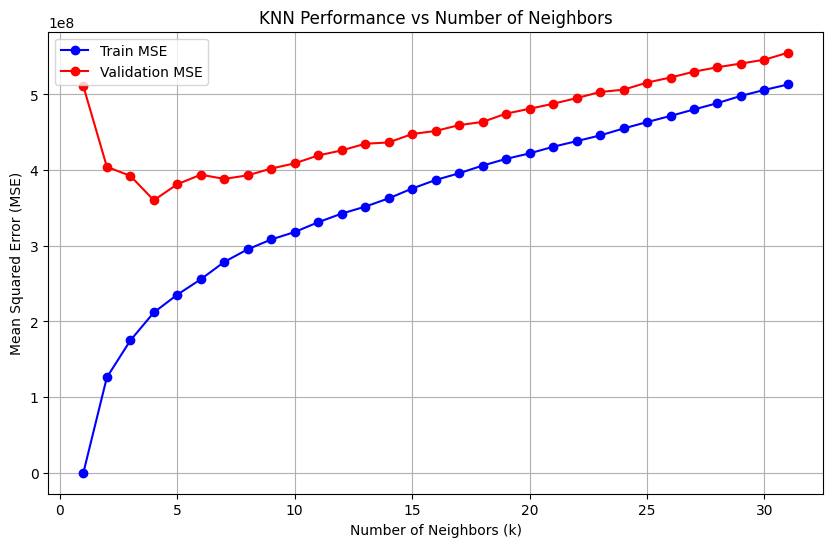

In [97]:

plt.figure(figsize=(10,6))

# MSE plot
plt.plot(results_df['n_neighbors'], results_df['Train_MSE'], label='Train MSE', color='blue', marker='o')
plt.plot(results_df['n_neighbors'], results_df['Val_MSE'], label='Validation MSE', color='red', marker='o')

plt.title('KNN Performance vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


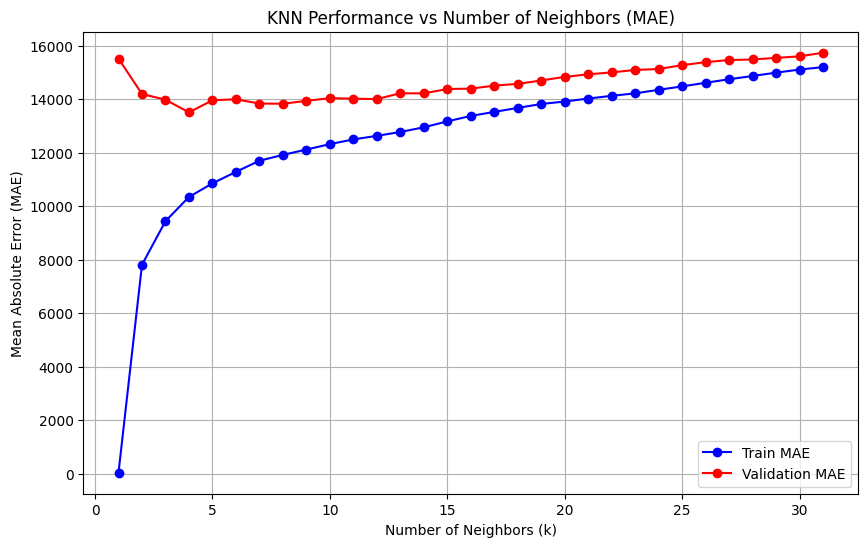

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# MAE plot
plt.plot(results_df['n_neighbors'], results_df['Train_MAE'], label='Train MAE', color='blue', marker='o')
plt.plot(results_df['n_neighbors'], results_df['Val_MAE'], label='Validation MAE', color='red', marker='o')

plt.title('KNN Performance vs Number of Neighbors (MAE)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
# dopo aver fatto il ciclo for e i plot. osservando i plot 
# si nota chiaramente che 4 e' il numero mas optimo perche 
# i valori di validation sono i piu bassi

knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=4, p=2, n_jobs=-1))
])

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 211912658.5
Validation MSE: 360117245.3

Train MAE: 10344.9
Validation MAE: 13507.4


## Linear Regression now without scaling check the performance

In [100]:
lr = Pipeline([

    ('lr', LinearRegression())
])

cv_results = cross_validate(lr, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 286231258.2
Validation MSE: 341104355.3

Train MAE: 12413.3
Validation MAE: 13354.8


## knn now without scaling check the performance - noterai che il modello va molto peggio 

In [101]:
knn = Pipeline([
 
    ('knn', KNeighborsRegressor(n_neighbors=4, p=2, n_jobs=-1))
])

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 554406730.5
Validation MSE: 948439521.4

Train MAE: 15786.4
Validation MAE: 20572.9


In [102]:
# ora si prova MinMaxScaler


knn = Pipeline([
    ('scale', MinMaxScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=4, p=2, n_jobs=-1))
])

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 244544681.9
Validation MSE: 430381109.6

Train MAE: 10875.7
Validation MAE: 14512.3


In [103]:
# ora si prova RobustScaler


knn = Pipeline([
    ('scale', RobustScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=4, p=2, n_jobs=-1))
])

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 347861372.1
Validation MSE: 595551691.9

Train MAE: 11830.3
Validation MAE: 15664.1


In [104]:
# ora si prova StandardScaler


knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=4, p=2, n_jobs=-1))
])

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 211912658.5
Validation MSE: 360117245.3

Train MAE: 10344.9
Validation MAE: 13507.4


| Escalador | Train MSE | Validation MSE | Train MAE | Validation MAE | Cómo funciona |
|------------|------------|----------------|------------|----------------|----------------|
| **MinMaxScaler** | 244,544,681.9 | 430,381,109.6 | 10,875.7 | 14,512.3 | Reescala todas las variables entre 0 y 1. Mantiene la forma de la distribución original, pero cambia la escala. Ideal para KNN y modelos basados en distancia. |
| **RobustScaler** | 347,861,372.1 | 595,551,691.9 | 11,830.3 | 15,664.1 | Reescala usando mediana y rango intercuartílico (IQR) en lugar de media y desviación estándar. Es más robusto frente a valores atípicos. |
| **StandardScaler** | 211,912,658.5 | 360,117,245.3 | 10,344.9 | 13,507.4 | Estandariza los datos a media 0 y desviación estándar 1. Supone que las variables siguen una distribución normal. |



## NOISE

Perform an experiment by adding noisy (random) features (columns) to your training data,
 while keeping all original features intact. Create a line plot where:
 ◦ The x-axis shows the number of noisy fts added, from 0 (no noise) to 100, in steps of 10.
 ◦ The y-axis shows the performance metric of your choice.
 ◦ What are your conclusions?

Crear una copia con ruido

In [105]:
import numpy as np

# Crear una copia del conjunto de entrenamiento
X_train_noisy = X_train.copy()

# Añadir 5 columnas de ruido (aleatorias)
for i in range(5):
    X_train_noisy[f'noise_{i+1}'] = np.random.randn(len(X_train_noisy))

print("Tamaño original de X_train:", X_train.shape)
print("Tamaño con ruido X_train_noisy:", X_train_noisy.shape)



Tamaño original de X_train: (635, 34)
Tamaño con ruido X_train_noisy: (635, 39)


Entrenar el modelo con ruido

In [106]:
knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=4, p=2, n_jobs=-1))
])

cv_results_noisy = cross_validate(knn, X_train_noisy, y_train, cv=kf,
                                  scoring=scoring, return_train_score=True)

print('Train MSE (noisy):', cv_results_noisy['train_MSE'].mean().round(1))
print('Validation MSE (noisy):', cv_results_noisy['test_MSE'].mean().round(1))
print()
print('Train MAE (noisy):', cv_results_noisy['train_MAE'].mean().round(1))
print('Validation MAE (noisy):', cv_results_noisy['test_MAE'].mean().round(1))


Train MSE (noisy): 244612029.6
Validation MSE (noisy): 405727747.2

Train MAE (noisy): 10896.3
Validation MAE (noisy): 14253.7


| Dataset                         | Train MSE     | Validation MSE | Train MAE | Validation MAE |
| ------------------------------- | ------------- | -------------- | --------- | -------------- |
| **Sin ruido (`X_train`)**       | 211,912,658.5 | 360,117,245.3  | 10,344.9  | 13,507.4       |
| **Con ruido (`X_train_noisy`)** | 236,526,818.0 | 396,896,801.5  | 10,917.2  | 14,285.9       |


## The weights  hyperparameter in kNN determines   
 how much influence each neighbor has on the
 predicted output.
 By default, kNN assigns equal weight to all neighbors (
 When you set 
 weights='uniform' ).
 weights='distance' , closer neighbors have a stronger impact on the prediction
 than those further away. This can lead to improved performance, especially in datasets where
 proximity is more indicative of the target value.

In [107]:
knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=4, p=2, n_jobs=-1, weights='distance'))
])

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 105088.8
Validation MSE: 347105123.9

Train MAE: 29.1
Validation MAE: 13114.8


| Parámetro `weights` | Train MSE | Validation MSE | Train MAE | Validation MAE | Cómo funciona |
|----------------------|-----------|----------------|------------|----------------|----------------|
| **distance** | 105,088.8 | 347,105,123.9 | 29.1 | 13,114.8 | Los vecinos **más cercanos tienen más peso** en la predicción. Esto puede mejorar la precisión, pero también hace que el modelo se adapte más a los datos de entrenamiento (mayor riesgo de sobreajuste). |
| **uniform** | 211,912,658.5 | 360,117,245.3 | 10,344.9 | 13,507.4 | Todos los vecinos tienen **el mismo peso**, sin importar su distancia. Es más estable y menos sensible al ruido, pero puede ser menos preciso en regiones con alta variación local. |


## Manhattan distance VS  Euclidean distance 

 The hyperparameter 
p  determines the distance metric used by kNN. 
Manhattan distance, 
p=1  corresponds to the
 p=2  corresponds to the Euclidean distance, and higher values of 
p  are
 different (more abstract) distance calculations, but still valid.
 ◦ Create a heatmap to visualize the performance of kNN with various combinations of
 n_neighbors (e.g., 1 to 10) and 
p  values (e.g., 1 to 5). Each cell in the heatmap should
 represent the performance metric for a specific combination of 
color of each cell summarizes the performance


P es el parametro de la distancia de meincosky


In [108]:
knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=4, p=1, n_jobs=-1,))
])

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

Train MSE: 178027560.9
Validation MSE: 302798322.3

Train MAE: 9402.9
Validation MAE: 12298.3


| p (Minkowski) | weights  | Train MSE     | Validation MSE | Train MAE | Validation MAE |
|---------------|----------|---------------|----------------|-----------|----------------|
| 1 (Manhattan) | uniform  | 178,027,560.9 | 302,798,322.3  | 9,402.9   | 12,298.3       |
| 2 (Euclidean) | uniform  | 211,912,658.5 | 360,117,245.3  | 10,344.9  | 13,507.4       |


## Grid search manual

In [109]:


results = []

# 🔁 Doble bucle: vecinos (1–10) y p (1–5)
for k in range(1, 11):       # n_neighbors
    for p in range(1, 6):    # distancia de Minkowski (p=1→Manhattan, p=2→Euclidean, etc.)
        
        # Definir el modelo KNN con cada combinación
        knn = Pipeline([
            ('scale', StandardScaler()),
            ('knn', KNeighborsRegressor(n_neighbors=k, p=p, n_jobs=-1))
        ])
        
        # Validación cruzada
        cv_results = cross_validate(
            knn, X_train, y_train,
            cv=kf,
            scoring=scoring,
            return_train_score=True
        )
        
        # Guardar resultados promedio
        results.append({
            'n_neighbors': k,
            'p': p,
            'Train_MSE': cv_results['train_MSE'].mean(),
            'Val_MSE': cv_results['test_MSE'].mean(),
            'Train_MAE': cv_results['train_MAE'].mean(),
            'Val_MAE': cv_results['test_MAE'].mean()
        })

# Convertir resultados en DataFrame
results_df = pd.DataFrame(results)

# Mostrar las primeras filas ordenadas por mejor Validation MAE
# results_df.sort_values(by='Val_MAE', ascending=True).head(10)
results_df.sort_values(by='Val_MAE', ascending=True)



,n_neighbors,p,Train_MSE,Val_MSE,Train_MAE,Val_MAE
20,5,1,1.966954e+08,2.911885e+08,9849.567717,12083.688199
15,4,1,1.780276e+08,3.027983e+08,9402.864911,12298.271255
10,3,1,1.487773e+08,3.065232e+08,8655.435198,12345.449182
25,6,1,2.154465e+08,3.120023e+08,10249.725881,12414.947264
40,9,1,2.620777e+08,3.402363e+08,11169.199261,12582.023046
30,7,1,2.331130e+08,3.263121e+08,10594.703603,12597.548877
5,2,1,1.075931e+08,3.146863e+08,7455.954923,12618.474219
35,8,1,2.492094e+08,3.367522e+08,10919.272381,12639.449814
45,10,1,2.729716e+08,3.510492e+08,11349.661214,12842.152696
16,4,2,2.119127e+08,3.601172e+08,10344.901542,13507.391834


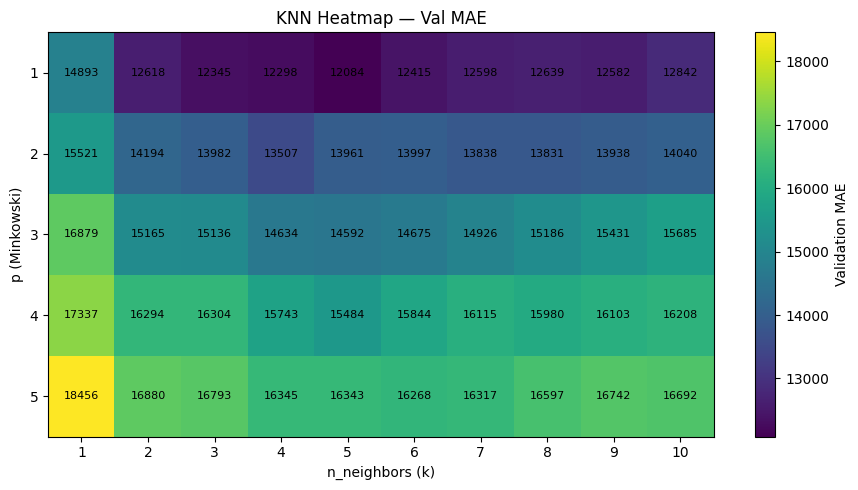

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# --- elige la métrica que quieres visualizar ---
METRIC = 'Val_MAE'   # opciones: 'Val_MAE' o 'Val_MSE'

# Pivot: filas = p, columnas = n_neighbors, celdas = métrica de validación
pivot = results_df.pivot(index='p', columns='n_neighbors', values=METRIC).sort_index()

plt.figure(figsize=(9, 5))
im = plt.imshow(pivot.values, aspect='auto')  # heatmap
plt.colorbar(im, label=f'Validation {METRIC.split("_")[1]}')

# Ejes y títulos
plt.title(f'KNN Heatmap — {METRIC.replace("_", " ")}')
plt.xlabel('n_neighbors (k)')
plt.ylabel('p (Minkowski)')

# Ticks con las etiquetas reales
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns)
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)

# Anotar cada celda con el valor (redondeado)
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        val = pivot.values[i, j]
        plt.text(j, i, f"{val:.0f}", ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()
